In [62]:
# Import libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# File read
f_wdata = pd.read_csv("winequality-red.csv")
print(f_wdata)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [87]:
# Duplicate data
duplicate_rows = f_wdata[f_wdata.duplicated(keep='first')]
duplicate_rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [88]:
f_wdata = f_wdata.drop_duplicates(keep='first')


In [89]:
# Duplicate data
duplicate_rows = f_wdata[f_wdata.duplicated(keep='first')]
duplicate_rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [90]:
# Removing null values
f_wdata = f_wdata.dropna().reset_index(drop=True)
print(f_wdata)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.247788          0.397260         0.00        0.068493   0.106845   
1          0.283186          0.520548         0.00        0.116438   0.143573   
2          0.283186          0.438356         0.04        0.095890   0.133556   
3          0.584071          0.109589         0.56        0.068493   0.105175   
4          0.247788          0.369863         0.00        0.061644   0.105175   
...             ...               ...          ...             ...        ...   
1354       0.194690          0.342466         0.08        0.068493   0.093489   
1355       0.141593          0.328767         0.08        0.075342   0.130217   
1356       0.115044          0.294521         0.10        0.089041   0.083472   
1357       0.115044          0.359589         0.12        0.075342   0.105175   
1358       0.123894          0.130137         0.47        0.184932   0.091820   

      free sulfur dioxide  

In [91]:
# Describe statistics for the numeric column
print(f_wdata.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        0.328371          0.280464     0.272333        0.111192   
std         0.153716          0.125364     0.195537        0.092624   
min         0.000000          0.000000     0.000000        0.000000   
25%         0.221239          0.184932     0.090000        0.068493   
50%         0.292035          0.273973     0.260000        0.089041   
75%         0.407080          0.356164     0.430000        0.116438   
max         1.000000          1.000000     1.000000        1.000000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.127085             0.209765              0.144261     0.487441   
std       0.082432             0.147145              0.118053     0.137219   
min       0.000000             0.000000         

In [92]:
# Select features and target
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
target = 'quality'

In [105]:
# Data matrix X and y
X = f_wdata[features]
y = f_wdata[target]

In [94]:
print(y)

0       5
1       5
2       5
3       6
4       5
       ..
1354    6
1355    5
1356    6
1357    5
1358    6
Name: quality, Length: 1359, dtype: int64


In [95]:
# Normalize non-categorical features
def normalizing(column):
    maximum_value = column.max()
    minimum_value = column.min()
    a = column - minimum_value
    b = maximum_value - minimum_value
    column = a / b
    return column

In [96]:
# Normalizing function 
f_wdata['fixed acidity'] = normalizing(f_wdata["fixed acidity"])
f_wdata['volatile acidity'] = normalizing(f_wdata["volatile acidity"])
f_wdata['citric acid'] = normalizing(f_wdata["citric acid"])
f_wdata['residual sugar'] = normalizing(f_wdata["residual sugar"])
f_wdata['chlorides'] = normalizing(f_wdata["chlorides"])
f_wdata['free sulfur dioxide'] = normalizing(f_wdata["free sulfur dioxide"])
f_wdata['total sulfur dioxide'] = normalizing(f_wdata["total sulfur dioxide"])
f_wdata['density'] = normalizing(f_wdata["density"])
f_wdata['pH'] = normalizing(f_wdata["pH"])
f_wdata['sulphates'] = normalizing(f_wdata["sulphates"])
f_wdata['alcohol'] = normalizing(f_wdata["alcohol"])
#f_wdata['quality'] = normalizing(f_wdata["quality"])

In [97]:
# Divide the dataset into training (80%) and test (20%)
devide = 0.8  # training data (80%)

datasample = len(f_wdata)
train_data = int(datasample * devide)
test_data = datasample - train_data

X_train = X.iloc[:train_data]
y_train = y.iloc[:train_data]
X_test = X.iloc[train_data:]
y_test = y.iloc[train_data:]

In [98]:
# Print training and test data shape
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1087, 11)
y_train shape: (1087,)
X_test shape: (272, 11)
y_test shape: (272,)


In [99]:
# Calculate w

X_trp = X.T                           # Transpose of the feature matrix X
X_trp_X = X_trp.dot(X)                # Determine X^T X
X_trp_X_inv = np.linalg.inv(X_trp_X)  # Determine the inverse of X^T X
X_trp_y = X_trp.dot(y)                # Determine the X^T y
w = X_trp_X_inv.dot(X_trp_y)          # Calculate the weight vector w

In [100]:
print (w)

[ 3.30331065 -0.08301671  0.37956193 -0.33712806  1.11505886  0.55397664
  0.59463992  1.01208134  4.92096006  2.2137194   3.03800802]


In [101]:
# Evaluate the predicted value of y
y_predict = X_test.dot(w)
print(y_predict)

1087    4.615680
1088    5.741275
1089    4.656492
1090    5.422837
1091    5.394568
          ...   
1354    5.281168
1355    5.335223
1356    6.123900
1357    5.771663
1358    5.399173
Length: 272, dtype: float64


In [102]:
# Evaluate the mean squared error (MSE)

residuals = y_test - y_predict
MSE = (1 / len(y_test)) * np.sum(residuals**2)
print(MSE)

0.8111520631916286


In [103]:
print(y_test, y_predict)

1087    6
1088    4
1089    6
1090    7
1091    6
       ..
1354    6
1355    5
1356    6
1357    5
1358    6
Name: quality, Length: 272, dtype: int64 1087    4.615680
1088    5.741275
1089    4.656492
1090    5.422837
1091    5.394568
          ...   
1354    5.281168
1355    5.335223
1356    6.123900
1357    5.771663
1358    5.399173
Length: 272, dtype: float64


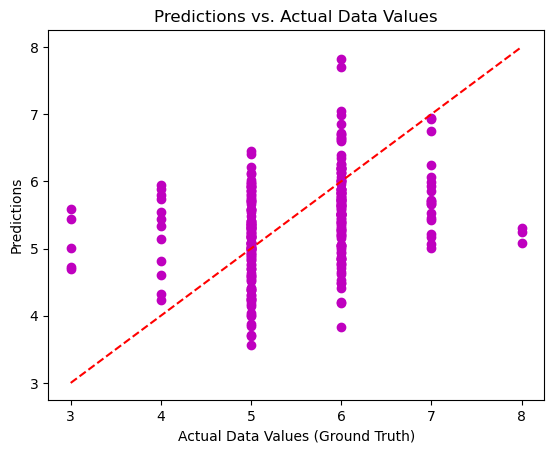

In [104]:
# Plot prediction vs the actual data values
plt.scatter(y_test, y_predict, c='m')
plt.xlabel("Actual Data Values (Ground Truth)")
plt.ylabel("Predictions")
plt.title("Predictions vs. Actual Data Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()

In [82]:
 # Loss value for training data and the weight vector.
X_train_trp = X_train.T                                      # Transpose of the matrix X_train
X_train_trp_X_train = X_train_trp.dot(X_train)               # Determine X_train^T X_train
X_train_trp_X_train_inv = np.linalg.inv(X_train_trp_X_train) # Determine the inverse of X^T X
X_train_trp_y_train = X_train_trp.dot(y_train)               # Determine the X^T y
w_train = X_train_trp_X_train_inv.dot(X_train_trp_y_train)   # Calculate the weight vector w

y_train_predict = X_train.dot(w_train)                       # Predicted value of y_train
residuals_train = y_train - y_train_predict                  # Residuals for training data
mse_train = (1 / len(y_train)) * np.sum(residuals_train**2)  # Mean Squared Error (MSE) for training data

print('Loss value for training data')
print(mse_train)
print('Final weight vector')
print(w_train)

Loss value for training data
0.4211216191436954
Final weight vector
[-1.36335262e-03 -1.11956532e+00 -1.61990282e-01 -2.45979946e-03
 -1.75365693e+00  2.21020686e-03 -3.12971515e-03  4.29280037e+00
 -4.56531803e-01  7.37977929e-01  3.17577225e-01]


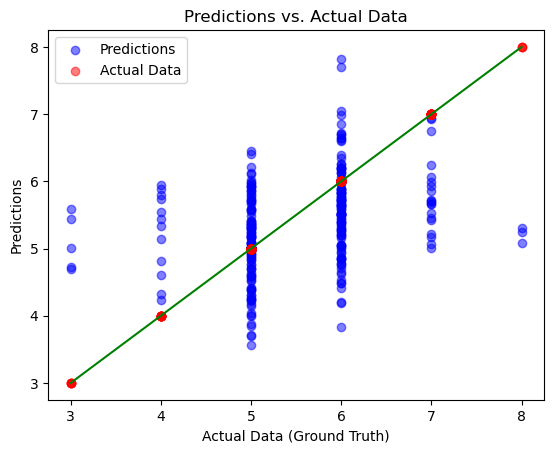

In [106]:
# Plot by comparing the predictions vs the actual test data.

plt.scatter(y_test, y_predict, c='b', label='Predictions', alpha=0.5)  # Predicted data
plt.scatter(y_test, y_test, c='r', label='Actual Data', alpha=0.5)     # Actual test data
plt.xlabel("Actual Data (Ground Truth)")
plt.ylabel("Predictions")
plt.title("Predictions vs. Actual Data")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'g-')
plt.legend()
plt.show()